In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#df = pd.read_csv("iperf.csv", index_col = [1])
df = pd.read_csv("Teste2/teste2.csv")
#Remove colunas desnecessarias
del df['Timestamp']
del df['?']
del df['ForaOrdem']
del df['Tempo']
df

,IpOri,PortaOri,IpDest,PortaDest,BitsEnv,Banda,Jitter,PctPerdido,PctEnv,%Perda
0,10.1.0.2,5527,10.1.0.1,5027,35391720,28311399,NaN,NaN,NaN,NaN
1,10.1.0.2,5511,10.1.0.1,5011,244746180,195796258,NaN,NaN,NaN,NaN
2,10.1.0.2,5548,10.1.0.1,5048,166462800,133168002,NaN,NaN,NaN,NaN
3,10.1.0.2,5590,10.1.0.1,5090,607922910,486338182,NaN,NaN,NaN,NaN
4,10.1.0.2,5510,10.1.0.1,5010,297551520,237956836,NaN,NaN,NaN,NaN
5,10.1.0.2,5520,10.1.0.1,5020,152702130,122022391,NaN,NaN,NaN,NaN
6,10.1.0.2,5557,10.1.0.1,5057,49744800,39755365,NaN,NaN,NaN,NaN
7,10.1.0.2,5558,10.1.0.1,5058,271844160,217298034,NaN,NaN,NaN,NaN
8,10.1.0.2,5580,10.1.0.1,5080,127966440,102287772,NaN,NaN,NaN,NaN
9,10.1.0.2,5544,10.1.0.1,5044,195867210,156471937,NaN,NaN,NaN,NaN


In [3]:
# Função para cálculo do intervalo de confiança de 95%
def confinterval (data):
    confidence = 0.95
    return st.sem (data) * st.t.ppf ((1 + confidence) / 2.0, len (data) - 1);

/home/pedro/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
/home/pedro/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/pedro/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


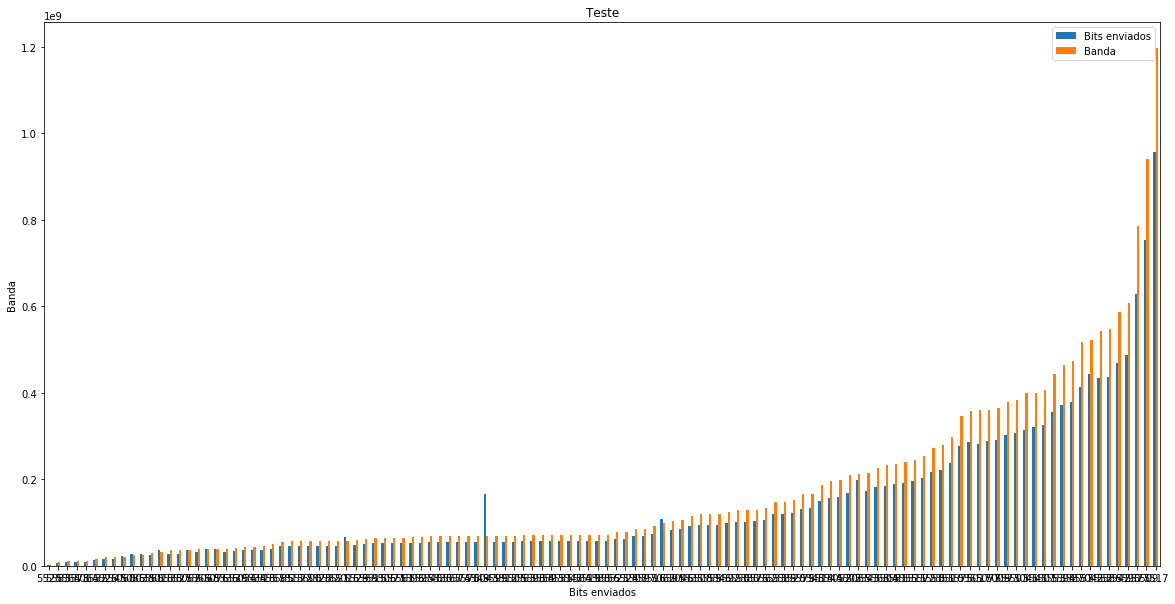

In [4]:
#Removendo trafegos pequenos
df = df.query("BitsEnv > 1000000")

gpb = df.groupby (['PortaOri'])
media = gpb.mean()
err = gpb.aggregate(confinterval)
err = err.filter(items=['Banda', 'BitsEnv'])
media = media.filter(items=['Banda', 'BitsEnv'])
#display (media)
#display (err)

media.sort_values(by=["BitsEnv"]).plot (kind='bar', yerr=err, title="Teste", rot=360, figsize=(20,10))
plt.xlabel('Bits enviados')
plt.ylabel('Banda')
plt.gca().legend(('Bits enviados','Banda'))
#plt.savefig('grafico_teste'.pdf')